In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn 

In [2]:
data = pd.read_csv('http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',sep = ';')

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.shape

(1599, 12)

In [5]:
print(data)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
5               7.4             0.660         0.00             1.8      0.075   
6               7.9             0.600         0.06             1.6      0.069   
7               7.3             0.650         0.00             1.2      0.065   
8               7.8             0.580         0.02             2.0      0.073   
9               7.5             0.500         0.36             6.1      0.071   
10              6.7             0.580         0.08             1.8      0.097   
11              7.5         

In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


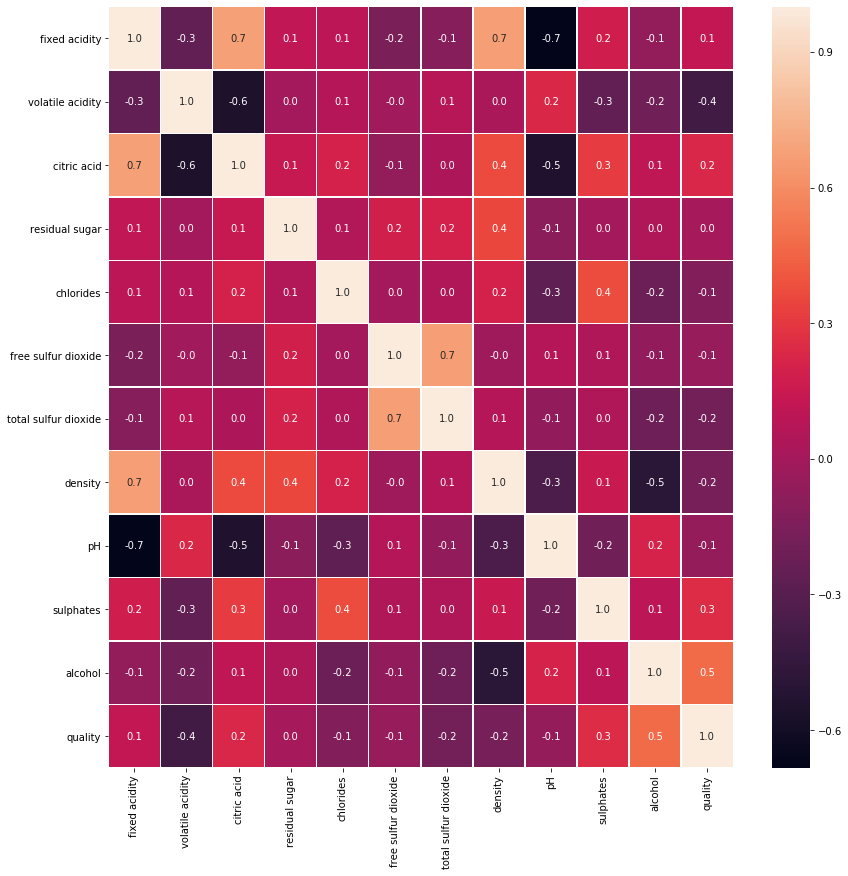

In [7]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [21]:
y = data.quality
X = data.drop('quality',axis =1)


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=123, 
                                                    stratify=y)
print(X_train.shape)

(1279, 11)


In [27]:
from sklearn.ensemble import RandomForestClassifier
Rf = RandomForestClassifier(n_estimators=100)
Rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
score = Rf.score(X_test,y_test)

In [29]:
print(score)

0.7125


In [30]:
Y_pred = Rf.predict(X_test)

In [31]:
print(Y_pred)

[7 6 5 6 6 5 5 5 5 6 5 6 6 5 6 6 6 6 6 7 5 6 5 6 6 5 6 5 6 6 6 6 6 5 5 6 5
 6 5 6 5 6 7 5 6 5 6 6 5 7 6 5 6 5 5 6 5 5 5 5 5 5 5 6 6 5 6 5 5 7 6 6 5 5
 5 6 5 5 5 5 6 6 6 6 5 7 7 7 6 5 6 6 6 6 6 6 7 7 6 7 5 6 5 6 5 5 6 5 6 6 6
 5 6 5 5 5 6 5 5 6 6 5 6 6 5 5 6 6 5 5 5 7 5 5 5 7 5 5 7 6 5 5 6 6 5 6 5 6
 6 5 6 5 5 5 5 6 5 6 6 5 6 5 5 6 5 6 5 6 6 5 6 5 6 5 5 6 5 5 6 5 6 5 5 5 5
 6 5 6 5 5 6 7 6 6 5 5 5 5 6 5 7 5 5 5 7 6 5 5 5 6 6 6 6 6 6 6 5 5 6 5 5 6
 6 5 6 6 6 6 5 7 6 5 6 6 5 5 6 7 6 5 5 6 5 6 6 5 5 5 5 6 5 5 5 5 6 7 6 5 6
 6 5 6 5 5 6 6 6 6 5 5 6 5 7 6 5 5 6 7 6 5 5 6 5 6 7 5 7 6 5 6 6 5 5 6 6 6
 6 6 6 6 5 6 6 7 6 6 6 5 5 6 5 5 6 7 6 5 6 6 6 5]


In [32]:
cmp = np.array([[Y_pred,y_test]])
cmp = cmp.reshape(len(Y_pred),2)
print(cmp)

[[7 6]
 [5 6]
 [6 5]
 [5 5]
 [5 6]
 [5 6]
 [6 5]
 [6 6]
 [6 6]
 [6 7]
 [5 6]
 [5 6]
 [6 5]
 [6 5]
 [6 6]
 [6 6]
 [6 5]
 [5 6]
 [5 6]
 [5 6]
 [5 6]
 [7 5]
 [6 5]
 [6 6]
 [5 7]
 [6 5]
 [6 5]
 [5 6]
 [5 5]
 [5 5]
 [5 5]
 [5 6]
 [6 5]
 [6 5]
 [5 7]
 [6 6]
 [5 5]
 [5 6]
 [5 5]
 [5 5]
 [6 6]
 [6 6]
 [5 7]
 [7 7]
 [6 5]
 [6 6]
 [6 6]
 [6 6]
 [7 7]
 [6 7]
 [5 6]
 [5 6]
 [5 5]
 [6 5]
 [6 6]
 [6 5]
 [6 5]
 [5 5]
 [6 5]
 [5 6]
 [6 5]
 [6 6]
 [5 5]
 [6 6]
 [5 5]
 [5 7]
 [5 5]
 [5 7]
 [5 5]
 [7 6]
 [5 5]
 [6 6]
 [5 6]
 [5 6]
 [6 5]
 [6 5]
 [5 5]
 [5 6]
 [5 6]
 [6 5]
 [6 5]
 [5 6]
 [5 6]
 [5 6]
 [6 5]
 [6 5]
 [6 5]
 [5 6]
 [5 5]
 [6 5]
 [6 5]
 [5 5]
 [5 6]
 [5 6]
 [5 5]
 [6 7]
 [6 6]
 [5 5]
 [5 5]
 [6 5]
 [7 5]
 [5 5]
 [7 6]
 [5 5]
 [5 6]
 [6 6]
 [6 6]
 [6 6]
 [5 5]
 [6 5]
 [5 6]
 [6 5]
 [6 6]
 [6 6]
 [5 7]
 [6 5]
 [6 6]
 [5 5]
 [6 7]
 [6 5]
 [5 6]
 [5 6]
 [6 5]
 [5 5]
 [5 6]
 [5 5]
 [5 5]
 [6 7]
 [6 5]
 [6 6]
 [5 6]
 [5 5]
 [6 6]
 [6 6]
 [5 5]
 [6 5]
 [7 6]
 [5 5]
 [6 7]
 [6 5]
 [5 6]
 [5 6]
 [7 5]

In [33]:
Rf.score(X_test,y_test) 

0.7125

In [34]:
from sklearn.metrics import mean_squared_error, r2_score
pred = Rf.predict(X_test)
print(r2_score(y_test, pred))
print(mean_squared_error(y_test, pred))

0.38010775470670144
0.4
